## Columns Description

1. `id` row id

2. `price` the Price of the cubic zirconia.

3. `carat` Carat weight of the cubic zirconia.

4. `cut` Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, ...

5. `color` Colour of the cubic zirconia.With D being the best and J the worst.

6. `clarity` cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best t...
(IF (best) , VVS1, VVS2, VS1 , VS2 , SI1, SI2 , I1 (worst))
                                                                                         
7. `popularity` how popula r i s similar diamond wi th these fea tu res

8. `table` The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

9. `x` Length of the cubic zirconia in mm.

10. `y` Width of the cubic zirconia in mm.

11. `z`  Height of the cubic zirconia in mm.

12. `dept` The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle...

## Start <a id="0"></a>

In [1]:
# Ignoring if any warning comes in between 
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing Basic library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading Data set 
df=pd.read_csv('cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# droping unnamed column
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
#shape
df.shape

(26967, 10)

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
# summary
df.describe(include=np.number)

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [8]:
# summary with object
df.describe(include='object')

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [9]:
#null values
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
# missing percentage value
df.isna().mean()*100

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

In [11]:
# columns with zeroes
(df==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          9
price      0
dtype: int64

## Know about data  <a id="1"></a>

1. There are total `26967 Rows` and  `10 columns`.

2. Here we have `7 numeric `and `3 object column`.

3. The column `depth` has `697 null` values.

4. Columns name `x,y,z` have `3,3,9 zeros` value respectivally.

## Dealing with missing values and zeros <a id="2"></a>

In [12]:
# frop duplicate record

print("With Duplicate :",df.shape)
df.drop_duplicates(inplace=True)
print("Without Duplicate :",df.shape)

With Duplicate : (26967, 10)
Without Duplicate : (26933, 10)


### 

Filling null values and zero values with mean ,median or mode


In [13]:
# so here i am going to use median to fill out null values
df['depth']=df['depth'].fillna(value=df['depth'].median())

In [14]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
# replacing zeros with median values
df['x']=df.x.replace(0,np.median(df.x))
df['y']=df.x.replace(0,np.median(df.y))
df['z']=df.x.replace(0,np.median(df.z))

In [16]:
(df==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## EDA <a id="3"></a>

## 

1. Outliers 

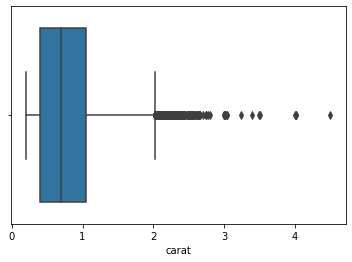

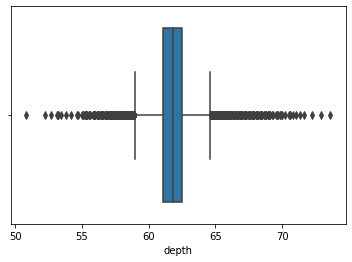

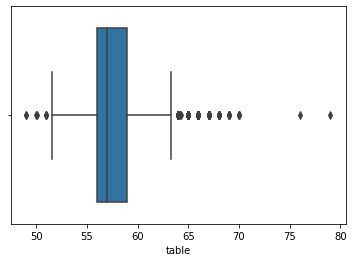

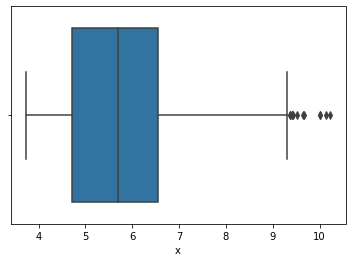

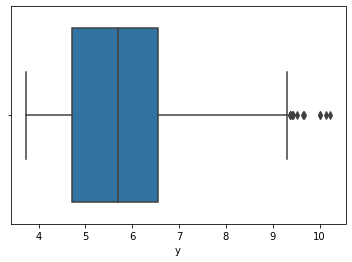

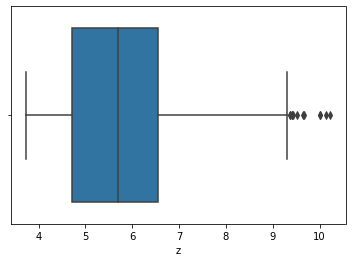

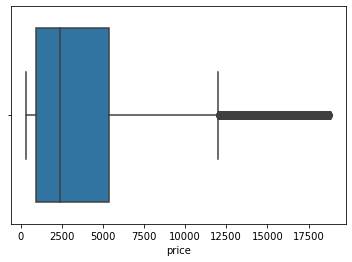

In [17]:
col = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in col:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In above graph you can see that all the collumns mention above have outliers 



`Dealing with outliers`

In [18]:
def remove_out(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for col in df[['carat','depth', 'table', 'x', 'y', 'z',
       'price']].columns:
    lower_range,upper_range=remove_out(df[col])
    df[col]=np.where(df[col]>upper_range,upper_range,df[col])
    df[col]=np.where(df[col]<lower_range,lower_range,df[col])

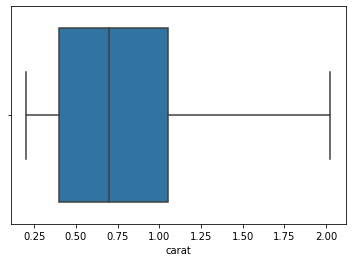

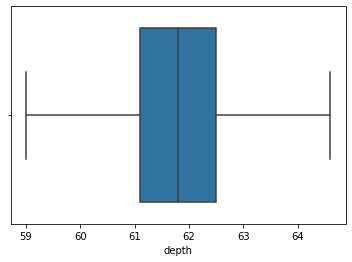

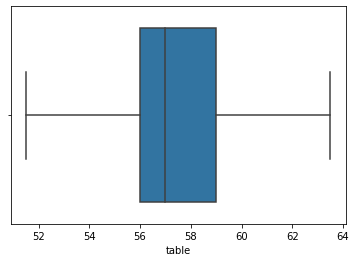

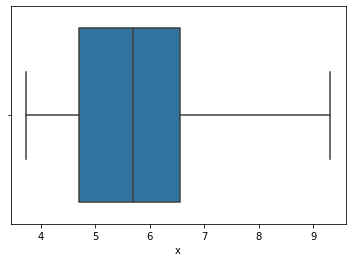

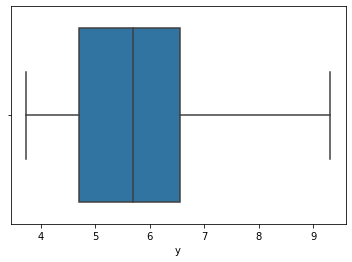

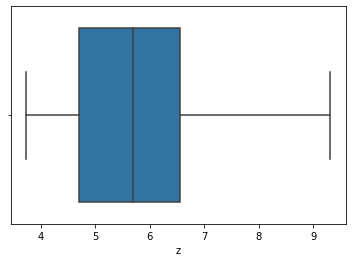

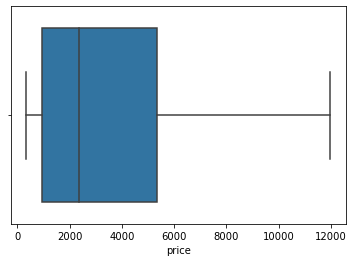

In [20]:
col = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in col:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

## Uivariate Analysis <a id='4'> </a>

<AxesSubplot:xlabel='y', ylabel='Count'>

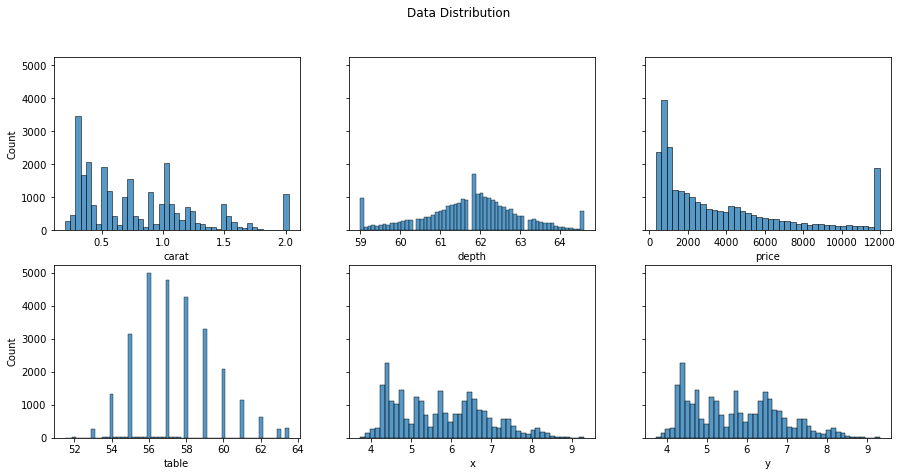

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), sharey=True)
fig.suptitle('Data Distribution')

#carat
sns.histplot(df['carat'],ax=ax[0,0])

#depth
sns.histplot(df['depth'],ax=ax[0,1])

#price
sns.histplot(df['price'],ax=ax[0,2])

#table
sns.histplot(df['table'],ax=ax[1,0])

#x
sns.histplot(df['x'],ax=ax[1,1])

#y
sns.histplot(df['y'],ax=ax[1,2])



In [22]:
df.skew()

carat    0.917162
depth   -0.194653
table    0.480121
x        0.397763
y        0.397763
z        0.397763
price    1.157688
dtype: float64

Ok , so there are some outliers in price column and carat column which are positively skewed

## Bivariate Analysis <a id='5'> </a>

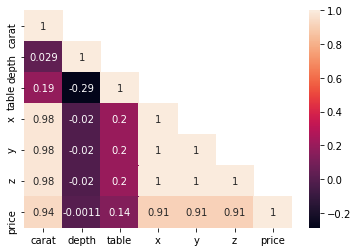

In [23]:
#heatmap

sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),+1))
plt.show()

So here you can see that columns x,y,z are highly correlated with price and also there is`multicollinearity` between x,y,z column

`We are going to drop two column for our prediction because of multicoliniarity`

In [24]:
df=df.drop(labels=['x','z'],axis=1)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,y,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,779.0


### Analysis for Categorical columns

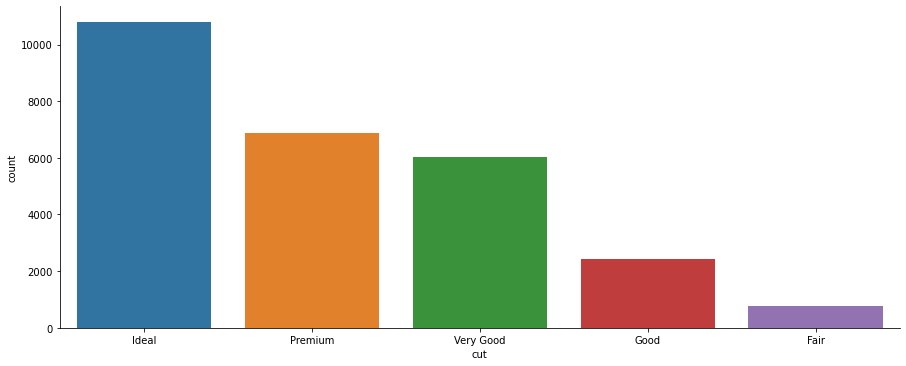

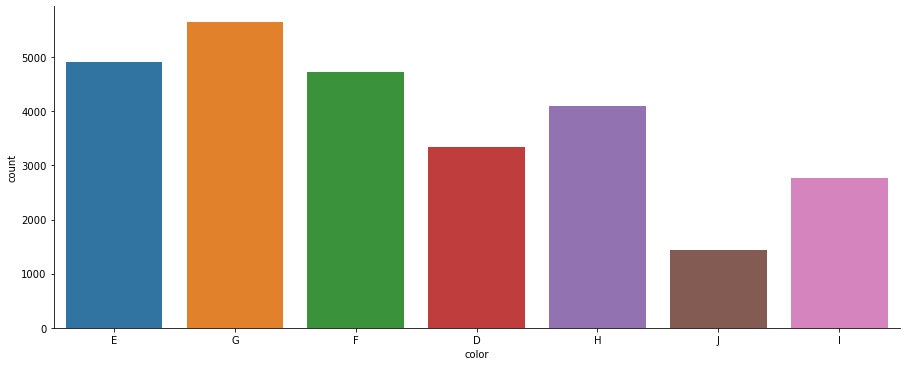

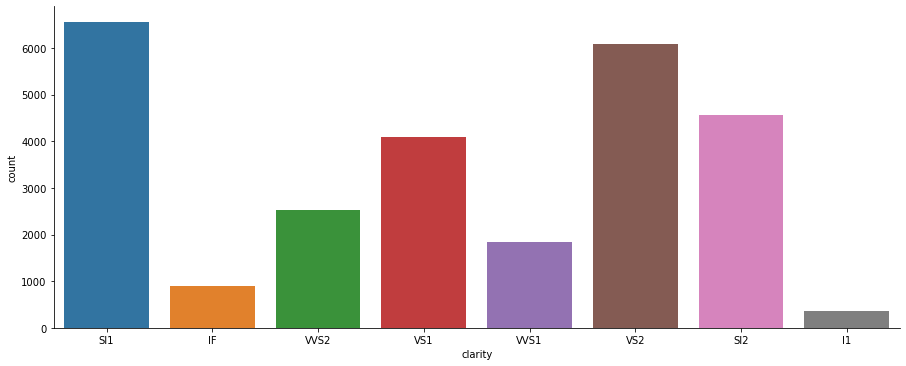

In [26]:

#cut
sns.catplot('cut', data=df, kind='count',aspect=2.5)
plt.show()

#color
sns.catplot('color', data=df, kind='count',aspect=2.5)
plt.show()

#clarity
sns.catplot('clarity', data=df, kind='count',aspect=2.5)
plt.show()

### Box plot for categorical data

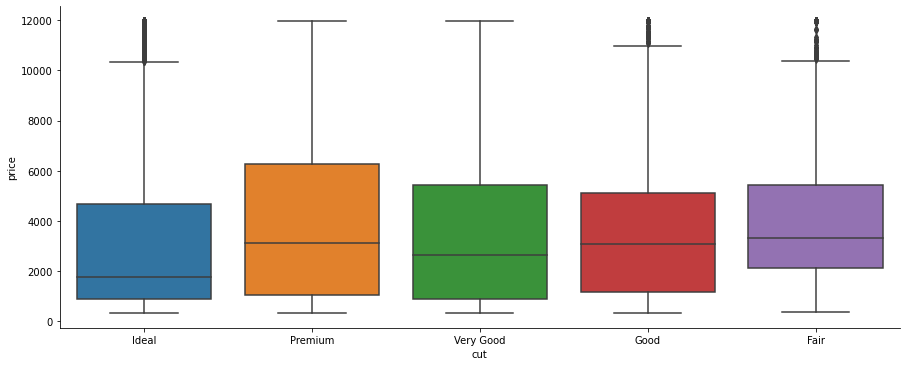

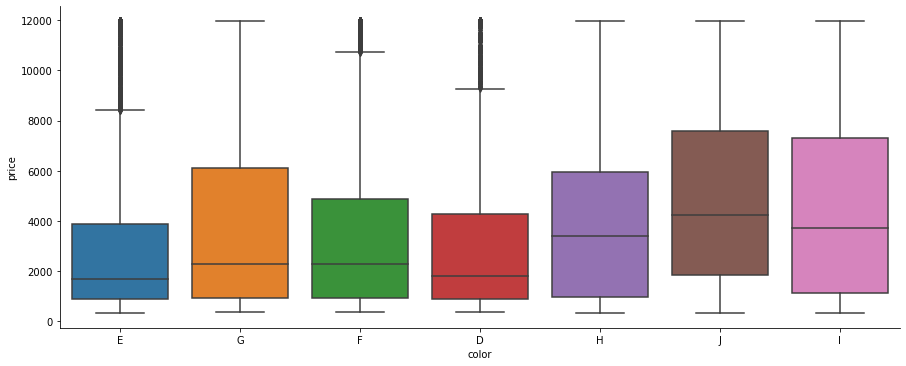

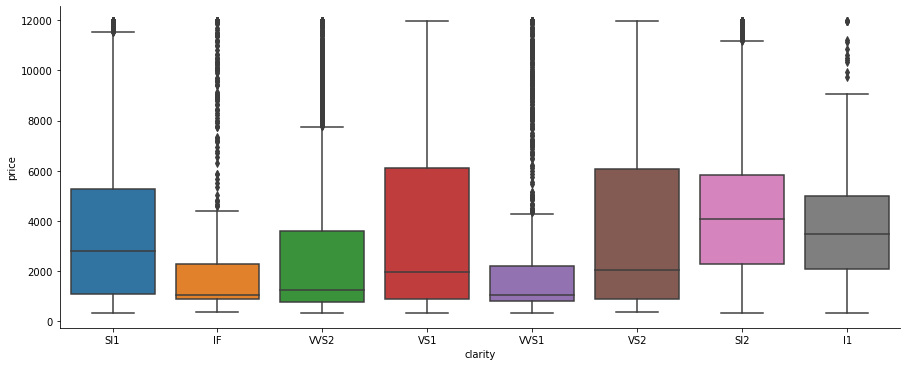

In [27]:
# box plot for cut
sns.catplot(x='cut', y='price', data=df, aspect =2.5, kind='box')

# box plot for color
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')

# box plot for clarity
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

plt.show()

## Modeling <a id='6'></a>

In [28]:
# importing sklearn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [29]:
# labeling the categorical variable

label_encoder=LabelEncoder()
df['cut']=label_encoder.fit_transform(df['cut'])
df['color']=label_encoder.fit_transform(df['color'])
df['clarity']=label_encoder.fit_transform(df['clarity'])

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,y,price
0,0.30,2,1,2,62.1,58.0,4.27,499.0
1,0.33,3,3,1,60.8,58.0,4.42,984.0
2,0.90,4,1,7,62.2,60.0,6.04,6289.0
3,0.42,2,2,4,61.6,56.0,4.82,1082.0
4,0.31,2,2,6,60.4,59.0,4.35,779.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   y        26933 non-null  float64
 7   price    26933 non-null  float64
dtypes: float64(5), int32(3)
memory usage: 2.8 MB


In [32]:
# ols summary
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.regression.linear_model as sm 
import statsmodels.api as s

In [33]:
result=sm.OLS(df['price'],s.add_constant(df[['cut','color','clarity','table','y','depth']])).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 2.805e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:53:52   Log-Likelihood:            -2.3108e+05
No. Observations:               26933   AIC:                         4.622e+05
Df Residuals:                   26926   BIC:                         4.622e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.453e+04    530.318    -27.391      0.0

`Here we are getting r square and adjusted r sqaure is equal to 86% and also there no need to drop any column because all column
has p value less than 5%.`

In [34]:
# spliting data into train test

X=df.drop(columns='price',axis=1)

In [35]:
Y=df['price']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [37]:
X_train.shape,X_test.shape

((18853, 7), (8080, 7))

### Creating model

In [38]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)


In [39]:
print("Accuracy of model : %.2f"%model.score(X_test,y_test))

Accuracy of model : 0.91


In [40]:
# Error 

from sklearn.metrics import mean_absolute_error,mean_squared_error


In [41]:
#MSE

y_pred=model.predict(X_test)
mean_squared_error(y_test,y_pred)

1109148.6989581494

In [42]:
# MAE
y_pred=model.predict(X_test)
mean_absolute_error(y_test,y_pred)

725.0069739162475

In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1053.1612881976575

## Result <a id='7'></a>

In [44]:
print("Accuracy of model : %.2f"%model.score(X_test,y_test))
print("Mean Square Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Square value :",np.sqrt(mean_squared_error(y_test,y_pred)))


Accuracy of model : 0.91
Mean Square Error :  1109148.6989581494
Root Mean Square value : 1053.1612881976575
